In [1]:
import hpotk
import os
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_patient_creator
from hpotk.validate import ValidationRunner
from hpotk.validate import ObsoleteTermIdsValidator, PhenotypicAbnormalityValidator, AnnotationPropagationValidator

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

validation_runner = ValidationRunner(
    validators=(
        ObsoleteTermIdsValidator(hpo),
        PhenotypicAbnormalityValidator(hpo),
        AnnotationPropagationValidator(hpo)
    ))

pc = configure_caching_patient_creator(hpo, validation_runner=validation_runner)

fpath_suox_cohort = os.path.join(os.getcwd(), os.pardir, 'notebooks', 'SUOX', 'phenopackets')
cohort = load_phenopacket_folder(fpath_suox_cohort, pc)
f'Loaded {len(cohort)} samples'

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 374.74it/s]


'Loaded 35 samples'

shifted_to_0_1=array([[0.9999499 , 0.99995079],
       [0.99995563, 0.99995881],
       [0.99997482, 1.        ]])
relative_scale=0.7
shifted_to_0_1 * relative_scale=array([[0.69996493, 0.69996555],
       [0.69996894, 0.69997117],
       [0.69998238, 0.7       ]])
shifted_to_0_1=array([[0.00000000e+00, 1.41058973e-06],
       [1.48201199e-06, 1.64271209e-06],
       [1.66056765e-06, 5.69592560e-06],
       [5.71378117e-06, 8.14213816e-06]])
relative_scale=0.7
shifted_to_0_1 * relative_scale=array([[0.00000000e+00, 9.87412808e-07],
       [1.03740839e-06, 1.14989846e-06],
       [1.16239736e-06, 3.98714792e-06],
       [3.99964682e-06, 5.69949671e-06]])
shifted_to_0_1=array([0.99996775, 0.99998214])
relative_scale=0.7
shifted_to_0_1 * relative_scale=array([0.69997743, 0.6999875 ])


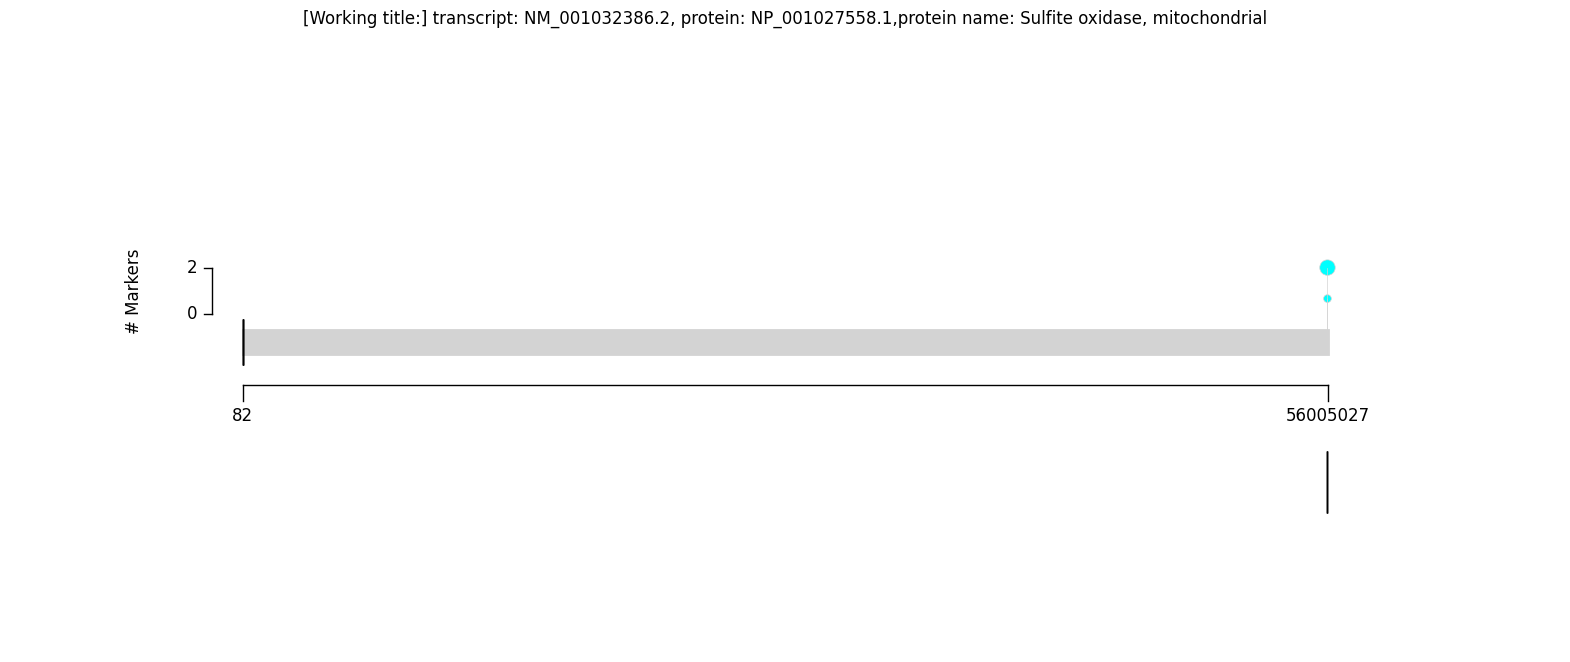

In [2]:
from genophenocorr.view._draw_variants import VariantsVisualizer
tx_id = 'NM_001032386.2'
protein_id = 'NP_001027558.1'
viz = VariantsVisualizer(tx_id, protein_id, cohort)
viz.draw_fig()

In [3]:
print('test')

test
